In [ ]:
#發送 http 請求以獲取網路上的資料
import requests
#用來處理和分析結構化數據
import pandas as pd
#用來處理時間
import datetime as dt

取的證交所上市公司個股成交資訊

In [ ]:
stock_id = '3017'

date = dt.date.today().strftime("%Y%m%d")

print('今日日期：',date)

stock_data = requests.get(f'https://www.twse.com.tw/rwd/zh/ \
            afterTrading/STOCK_DAY?date={date}&stockNo={stock_id}')
json_data = stock_data.json()

df = pd.DataFrame(data=json_data['data'],
                        columns=json_data['fields'])

df





今日日期： 20250912


,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,114/09/01,"12,965,993","12,495,924,300",986.00,"1,005.00",938.00,941.00,-69.00,"32,040"
1,114/09/02,"7,478,377","7,163,956,714",964.00,976.00,942.00,949.00,+8.00,"12,703"
2,114/09/03,"5,278,547","4,981,515,606",950.00,954.00,936.00,936.00,-13.00,"12,756"
3,114/09/04,"6,747,256","6,305,801,691",942.00,952.00,916.00,935.00,-1.00,"13,114"
4,114/09/05,"9,202,548","8,635,050,234",950.00,952.00,924.00,944.00,+9.00,"16,347"
5,114/09/08,"9,220,136","8,911,505,462",959.00,981.00,950.00,964.00,+20.00,"15,093"
6,114/09/09,"7,644,952","7,388,684,205",972.00,974.00,957.00,961.00,-3.00,"12,139"
7,114/09/10,"10,817,353","10,615,021,235",972.00,995.00,968.00,979.00,+18.00,"17,795"
8,114/09/11,"16,075,555","16,543,998,582","1,000.00","1,065.00",992.00,"1,025.00",+46.00,"27,565"


In [ ]:
def convert_minguo_to_ad(date_str):
    # 113/09/10 透過「/」分割成清單 [113, 09, 10]
    # 分配給變數 year=113, month=09, day=10
    year, month, day = date_str.split('/')
    ad_year = int(year) + 1911  # 將民國年轉換為西元年
    return f"{ad_year}/{month}/{day}"

# 所有民國日期都轉西元日期 e.g.113/09/10 -> 2024/09/10
df['日期'] = df['日期'].apply(convert_minguo_to_ad)

# 轉換為 pandas 中的 datetime 格式
df['日期'] = pd.to_datetime(df['日期'], format='%Y/%m/%d')

start_date = '2025/09/01'
end_date = '2025/09/12'

# 篩選日期
filtered_df = df[(df['日期'] >= start_date) & (df['日期'] <= end_date)]

print(filtered_df)

          日期        成交股數            成交金額       開盤價       最高價     最低價  \
0 2025-09-01  12,965,993  12,495,924,300    986.00  1,005.00  938.00   
1 2025-09-02   7,478,377   7,163,956,714    964.00    976.00  942.00   
2 2025-09-03   5,278,547   4,981,515,606    950.00    954.00  936.00   
3 2025-09-04   6,747,256   6,305,801,691    942.00    952.00  916.00   
4 2025-09-05   9,202,548   8,635,050,234    950.00    952.00  924.00   
5 2025-09-08   9,220,136   8,911,505,462    959.00    981.00  950.00   
6 2025-09-09   7,644,952   7,388,684,205    972.00    974.00  957.00   
7 2025-09-10  10,817,353  10,615,021,235    972.00    995.00  968.00   
8 2025-09-11  16,075,555  16,543,998,582  1,000.00  1,065.00  992.00   

        收盤價    漲跌價差    成交筆數  
0    941.00  -69.00  32,040  
1    949.00   +8.00  12,703  
2    936.00  -13.00  12,756  
3    935.00   -1.00  13,114  
4    944.00   +9.00  16,347  
5    964.00  +20.00  15,093  
6    961.00   -3.00  12,139  
7    979.00  +18.00  17,795  
8  1,025.

取得連續月份資料
以個股本益比為例



In [ ]:
# 設定查找時間
date_list = ['20250701', '20250801', '20250901']

all_df = pd.DataFrame()

# 使用迴圈抓取連續月份資料
for date in date_list:
    # 取得證交所網站資料，帶入網址參數 date：時間，stock_id：股票代號
    # https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20240918&stockNo=2303
    # https://www.twse.com.tw/rwd/zh/afterTrading/BWIBBU?date=20240303&stockNo=2303
    url = f'https://www.twse.com.tw/rwd/zh/afterTrading/\
      BWIBBU?date={date}&stockNo={stock_id}'

    try:

        # 取得證交所網站資
        stock_data = requests.get(url)

        # 將結果轉換 JSON 格式
        json_data = stock_data.json()

        # 將 JSON 格式轉換爲 Dataframe 格式，
        # 方便在 Python 中處理結構化資料
        df = pd.DataFrame(data=json_data['data'],
                          columns=json_data['fields'])

        # 添加新數據
        all_df = pd.concat([all_df, df], ignore_index=True)

    except Exception as e:

        # 發生錯誤時，列印錯誤訊息
        print(f'無法取得{date}的資料, 可能資料量不足.')


# 輸出前 5 筆資料
print(all_df)

            日期 殖利率(%)  股利年度    本益比  股價淨值比  財報年/季
0   114年07月01日   1.32   113  29.84  10.16  114/1
1   114年07月02日   1.32   113  30.00  10.21  114/1
2   114年07月03日   1.28   113  30.95  10.54  114/1
3   114年07月04日   1.29   113  30.71  10.45  114/1
4   114年07月07日   1.31   113  30.12  10.25  114/1
5   114年07月08日   1.26   113  31.42  10.70  114/1
6   114年07月09日   1.23   113  32.06  10.91  114/1
7   114年07月10日   1.18   113  33.40  11.37  114/1
8   114年07月11日   1.21   113  32.69  11.13  114/1
9   114年07月14日   1.21   113  32.77  11.15  114/1
10  114年07月15日   1.17   113  33.72  11.48  114/1
11  114年07月16日   1.18   113  33.52  11.41  114/1
12  114年07月17日   1.18   113  33.36  11.36  114/1
13  114年07月18日   1.12   113  35.22  11.99  114/1
14  114年07月21日   1.15   113  34.47  11.73  114/1
15  114年07月22日   1.17   113  33.68  11.46  114/1
16  114年07月23日   1.18   113  33.36  11.36  114/1
17  114年07月24日   1.17   113  33.83  11.52  114/1
18  114年07月25日   1.18   113  33.56  11.42  114/1
19  114年07月28日   1.1

使用yahoo fiance 取得資料

匯入套件

In [ ]:
!pip install yfinance

In [ ]:
# yahoo finance 套件
import yfinance as yf
# 用來處理和分析結構化數據
import pandas as pd

# 用來處理時間
import datetime as dt

In [ ]:
# 輸入股票代號
stock_id = "3017.tw"
# stock_id = "2357.tw"
# stock_id = "AAPL"
# stock_id = "NVDA"

'''今天往前算幾天'''
# 資料結束時間
end = dt.date.today()
# 抓取半年資料（現在-過去180天）
start = end - dt.timedelta(days=180)

'''抓取特定時間'''
# start = dt.datetime(2024, 1, 1)  # 指定的開始日期
# end = dt.datetime(2024, 6, 30)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
df = yf.download(stock_id, start=start, end=end).reset_index()

# 刪除 Ticker 欄位並取代
df.columns = df.columns.droplevel('Ticker')

df

/tmp/ipython-input-332208350.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_id, start=start, end=end).reset_index()
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
0,2025-03-17,556.134521,581.909027,555.143194,574.969737,8520036
1,2025-03-18,559.108521,568.030465,556.134539,564.065156,4279041
2,2025-03-19,528.377380,557.125868,526.394726,557.125868,9012134
3,2025-03-20,546.221252,553.160542,532.342673,535.316654,7253113
4,2025-03-21,530.360046,546.221281,530.360046,545.229954,5443987
...,...,...,...,...,...,...
119,2025-09-05,944.000000,952.000000,924.000000,950.000000,8920298
120,2025-09-08,964.000000,981.000000,950.000000,959.000000,8951099
121,2025-09-09,961.000000,974.000000,957.000000,972.000000,7443265
122,2025-09-10,979.000000,995.000000,968.000000,972.000000,10471694


**資料可視化**



可視化收盤價折線圖

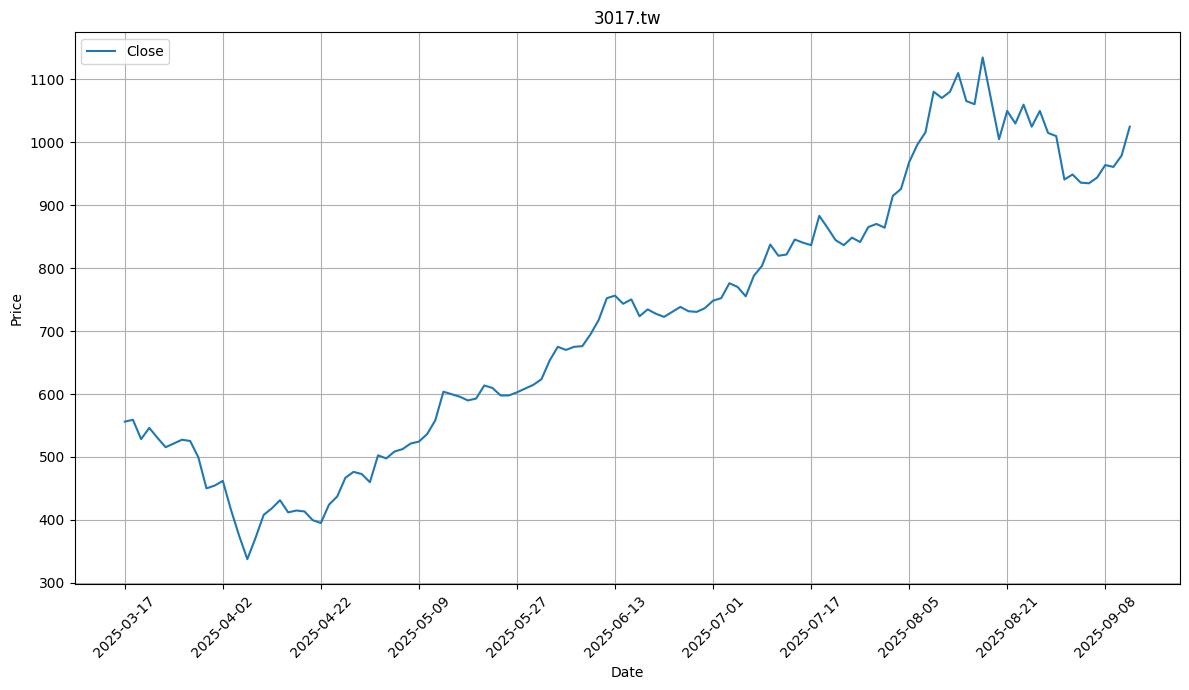

In [ ]:
import matplotlib.pyplot as plt

# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Close'], label='Close')

# 設定 x 軸的時間
num = 10
date = df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'{stock_id}')   # 將股票代號設為圖標
plt.xlabel('Date')         # x 軸標籤
plt.ylabel('Price')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True) # 在圖上顯示網格
plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊

# 顯示圖表
plt.show()